Name : Muchammad Romadona <br>
NIM  : 211351085 <br>
Class: Malam B

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"loyaltyy","key":"06ff76d4d8ac0abd1fb83403f7e96532"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/autism-screening-on-adults

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults
License(s): other
  0% 0.00/7.38k [00:00<?, ?B/s]
100% 7.38k/7.38k [00:00<00:00, 11.2MB/s]


In [4]:
!unzip autism-screening-on-adults.zip -d data
!ls data

Archive:  autism-screening-on-adults.zip
  inflating: data/autism_screening.csv  
autism_screening.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model


In [6]:
df = pd.read_csv("data/autism_screening.csv")
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [7]:
df.shape

(704, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

Dropping age_desc cause it's irrelavent, we already got age, so....yea..country of res as well, cause there's too much country on the columns and i doubt there's any correlation between autism and country of origin.

In [9]:
df = df.drop(columns=['age_desc'])
df = df.drop(columns=['contry_of_res'])

we gonna check if there's any null value on the table

In [10]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

<Axes: title={'center': 'age'}, xlabel='Class/ASD'>

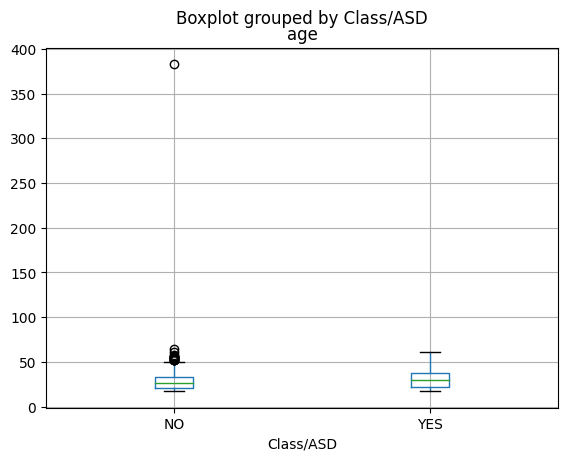

In [11]:
df.boxplot(by ='Class/ASD', column =['age'], grid = True)

wadeheilll??? kok ada yang umurnya diatas 350 tahun, sepertinya outlier, harus hapus!, sekalian sama ngisi nilai null dengan nilai mean column aja.

In [12]:
df.drop(df[df['age'] == 383].index, inplace=True)


<Axes: title={'center': 'age'}, xlabel='Class/ASD'>

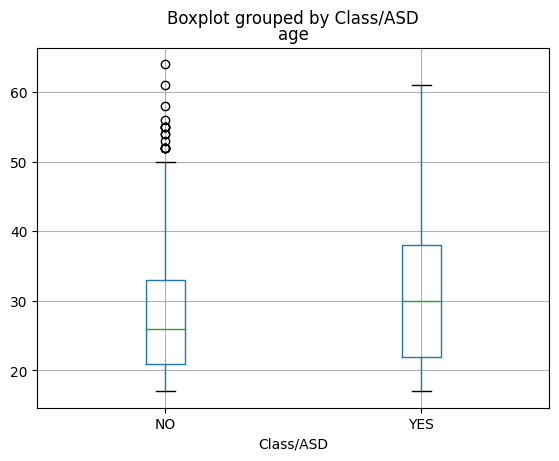

In [13]:
df.boxplot(by ='Class/ASD', column =['age'], grid = True)

outlier gone!! legoooo

In [14]:
df['age'] = df[['age']].fillna(df[['age']].mean(axis=0))
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         703 non-null    int64  
 1   A2_Score         703 non-null    int64  
 2   A3_Score         703 non-null    int64  
 3   A4_Score         703 non-null    int64  
 4   A5_Score         703 non-null    int64  
 5   A6_Score         703 non-null    int64  
 6   A7_Score         703 non-null    int64  
 7   A8_Score         703 non-null    int64  
 8   A9_Score         703 non-null    int64  
 9   A10_Score        703 non-null    int64  
 10  age              703 non-null    float64
 11  gender           703 non-null    object 
 12  ethnicity        703 non-null    object 
 13  jundice          703 non-null    object 
 14  austim           703 non-null    object 
 15  used_app_before  703 non-null    object 
 16  result           703 non-null    float64
 17  relation         703 

8 columns uses object, which means we have to convert them into numerical values. We can use an encoder to make this job easier.

In [16]:
df.drop(df[df['ethnicity'] == "?"].index, inplace=True)

In [17]:
df.shape

(608, 19)

In [18]:
object_columns = ['gender', 'ethnicity', 'jundice', 'austim', 'used_app_before', 'relation', 'Class/ASD']
object_columns

['gender',
 'ethnicity',
 'jundice',
 'austim',
 'used_app_before',
 'relation',
 'Class/ASD']

check unique data on each categorial columns

In [19]:
for columns in object_columns:
  print(df[columns].unique())

['f' 'm']
['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['Self' 'Parent' 'Health care professional' 'Relative' 'Others']
['NO' 'YES']


In [20]:
le = LabelEncoder()
for columns in object_columns:
  print("before : ", df[columns].unique())
  df[columns] = le.fit_transform(df[columns])
  print("after : ", df[columns].unique())


before :  ['f' 'm']
after :  [0 1]
before :  ['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
after :  [ 9  3  5  1  0  4  6  7  2  8 10]
before :  ['no' 'yes']
after :  [0 1]
before :  ['no' 'yes']
after :  [0 1]
before :  ['no' 'yes']
after :  [0 1]
before :  ['Self' 'Parent' 'Health care professional' 'Relative' 'Others']
after :  [4 2 0 3 1]
before :  ['NO' 'YES']
after :  [0 1]


In [21]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,0,6.0,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,0,5.0,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,0,8.0,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,0,6.0,4,0
5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,0,9.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,0,6,0,0,0,10.0,4,1
699,0,1,0,1,1,0,1,1,1,1,25.0,0,9,0,0,0,7.0,4,1
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,0,3.0,2,0
702,1,0,0,1,1,0,1,0,1,1,35.0,1,7,0,0,0,6.0,4,0


In [22]:
X = df.drop(columns = ['Class/ASD'])
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,0,6.0,4
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,0,5.0,4
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,0,8.0,2
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,0,6.0,4
5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,0,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,0,6,0,0,0,10.0,4
699,0,1,0,1,1,0,1,1,1,1,25.0,0,9,0,0,0,7.0,4
700,1,0,0,0,0,0,0,1,0,1,34.0,1,2,0,0,0,3.0,2
702,1,0,0,1,1,0,1,0,1,1,35.0,1,7,0,0,0,6.0,4


In [23]:
y = df['Class/ASD']
y

0      0
1      0
2      1
3      0
5      1
      ..
698    1
699    1
700    0
702    0
703    1
Name: Class/ASD, Length: 608, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [25]:
print("X_train shape : ", X_train.shape)

X_train shape :  (425, 18)


In [26]:
model = Sequential([
    Dense(10, activation='relu', input_dim=(18)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 359 (1.40 KB)
Trainable params: 359 (1.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


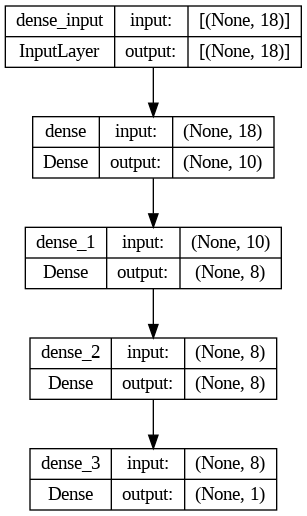

In [28]:
plot_model(model, show_shapes=True)

In [29]:
history = model.fit(X_train, y_train, epochs=150, validation_split=.25)

Epoch 1/150
10/10 [==============================] - 3s 76ms/step - loss: 1.6378 - accuracy: 0.3239 - val_loss: 1.4436 - val_accuracy: 0.2617
Epoch 2/150
10/10 [==============================] - 0s 19ms/step - loss: 1.2806 - accuracy: 0.3239 - val_loss: 1.1423 - val_accuracy: 0.2617
Epoch 3/150
10/10 [==============================] - 0s 11ms/step - loss: 1.0165 - accuracy: 0.3239 - val_loss: 0.9211 - val_accuracy: 0.2617
Epoch 4/150
10/10 [==============================] - 0s 14ms/step - loss: 0.8053 - accuracy: 0.3239 - val_loss: 0.7420 - val_accuracy: 0.4206
Epoch 5/150
10/10 [==============================] - 0s 10ms/step - loss: 0.6422 - accuracy: 0.5943 - val_loss: 0.6308 - val_accuracy: 0.6168
Epoch 6/150
10/10 [==============================] - 0s 22ms/step - loss: 0.5533 - accuracy: 0.7547 - val_loss: 0.5852 - val_accuracy: 0.7196
Epoch 7/150
10/10 [==============================] - 0s 19ms/step - loss: 0.5262 - accuracy: 0.7642 - val_loss: 0.5647 - val_accuracy: 0.7570
Epoch 

In [30]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.9672


[0.09257951378822327, 0.9672130942344666]

In [31]:
prediction = model.predict([[1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	27.0,	0,	6,	0,	0,	0,	10.0,	4]])
print(prediction)

if prediction > 0.5 :
  print("You might be Autistic")
else :
  print("You're not Autistic")

1/1 [==============================] - 0s 210ms/step
[[0.999572]]
You might be Autistic


In [ ]:
#DONE!!

Exporting the model into tflite format

In [ ]:
model.save('./autism.h5')
model = tf.keras.models.load_model('./autism.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./autism.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3992

6/6 [==============================] - 0s 3ms/step


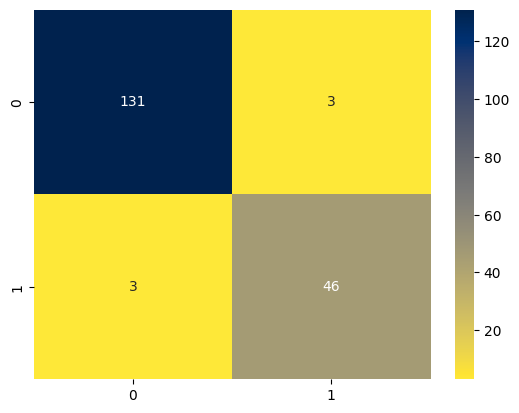

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()